<a href="https://colab.research.google.com/github/haishan-shi/A1/blob/master/NB02_Practical_Data_Skills_ArrayOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 Practical Skill 1 -- Array Operations

## 5.1 Brief of Data Wrangling Tools with Discussion on When to Use Which

### 5.1.1 Small arrays and tables

Arrays are a very generic representation of the data. When an array is 2D,  it is often called a table. Usually, each row of a table represent one data sample, and each column of the table corresponds to one attribute of the data. Table data is perhaps the most the common simplest format of data. if all the values in the table are numerical,  and especially when we want to perform computations on the table a `numpy` array (see next subsection for details) is a convenient choice.

On the other hand, a pandas dataframe should be considered if
- the types of the values in the table are different,  or
- we needed to deal with issues such as missing values,  or
- It is convenient in the analysis to refer to the meaning of the attributes,  such as instead of being called “attribute-2”,  we want to call the attribute “petal_length”.

An example of table data is the basic machine learning dataset "Iris".

Note in the following example, `seaborn` is an accompany library facilitating quick prototyping and visualisation / inspection of `DataFrames` of the `pandas` library.

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Alternatively, if we manage the data in numpy arrays

In [2]:
from sklearn.datasets import load_iris

iris_np = load_iris()
print(iris_np.data.shape)
print(iris_np.data[:5])
print(iris_np.target[:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### 5.1.2 Homogeneous Arrays

When the data contains large amount of attributes, those attributes are organised in a spatially regular and meaningful way, then we use typical numerical multidimensional arrays. 

The numerical computaiton library `numpy` provides convenient interfaces to efficient computation tools of manipulating arrays. Check the [online document][numpy-doc] for more details.

[numpy-doc]:https://www.numpy.org/

> Numpy has a sister library, `scipy`, which contains higher level (overlapping to an extent) functions. E.g. `numpy` performs linear algebric operators, e.g. compute $C$ in $A \times B \rightarrow C$, where $A$  and $B$ are matrices or vectors, while `scipy` can do the inverse computation, i.e. finding out $A$, where $A \times B \rightarrow C$)


#### Example of image pixels

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_images
ims = load_sample_images()

In [5]:
image_0 = ims.images[0]
print(image_0.shape)
# White-board illustration-1.

(427, 640, 3)


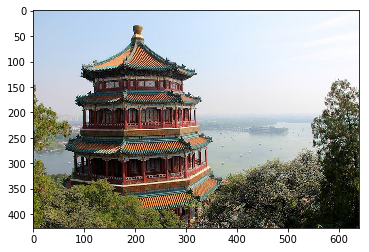

In [6]:
plt.imshow(image_0)
plt.show()

In [0]:
image_1 = ims.images[1]

In [9]:
images = np.stack((image_0, image_1)) 
# Stack: combine samples - one more dimension
# Continue White-board illustration-1
print(images.shape)

(2, 427, 640, 3)


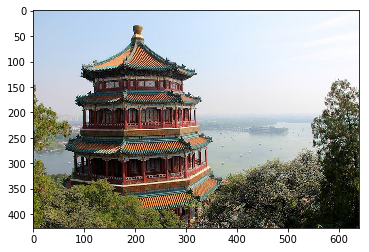

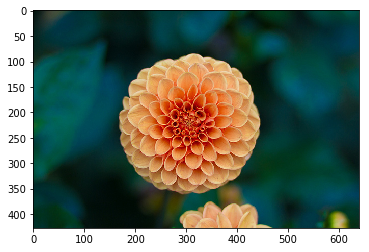

In [10]:
plt.imshow(images[0])
plt.show()
plt.imshow(images[1])
plt.show()

Let's apply a partial blue-filter and a total red filter to the two images.

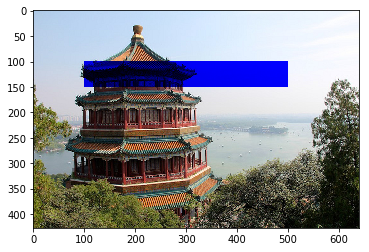

In [11]:
image_0[100:150, 100:500, 0:2] = 0
plt.imshow(image_0)
plt.show()
# White board illustration-2

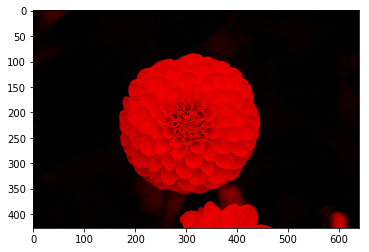

In [12]:
# Guess the effect?
image_1[:, :, 1:] = 0
plt.imshow(image_1)
plt.show()

## 5.2 Advanced Array Operations

### 5.2.1 Indexing

The following code is a simple visualiser.

In [0]:
def show_array(a):
    if a.ndim == 1: 
        a = a[:, np.newaxis]
    fig, axes = plt.subplots(1)
    fig.set_size_inches(a.shape[1]/2, a.shape[0]/2)
    axes.imshow(a)
    axes.set_xticks(np.arange(a.shape[1]))
    axes.set_yticks(np.arange(a.shape[0]))

Study the following example, and perform the following exercise.

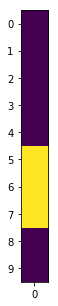

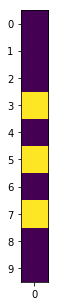

In [14]:
a = np.zeros((10, 1))
a[5:8]=1
show_array(a)

a = np.zeros((10, 1))
a[3:8:2]=1
show_array(a)

__EXERCISE__

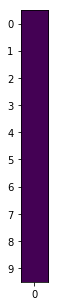

In [15]:
# Replace ... to produce (1) and (2) (in two experiments)
a = np.zeros((10, 1))
a[...]=1
show_array(a)

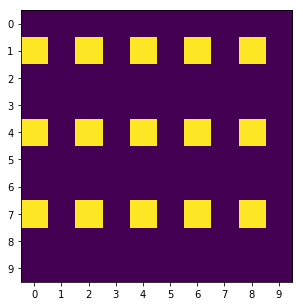

In [16]:
# Replace ... to produce (3) and (4) (in two experiments)
a = np.zeros((10, 10))
a[1::3, ::2]=1
show_array(a)

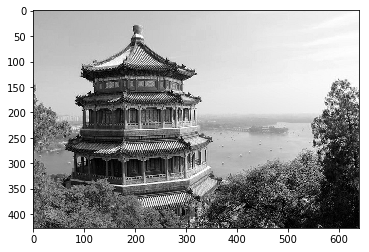

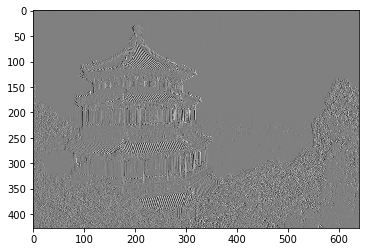

In [17]:
# Consider the `im` array
ims = load_sample_images()
im = ims.images[0][:,:, 0]/255
plt.imshow(im, cmap="gray")
plt.show()

# Explain what you see in im_h
im_h = im[:, 1:] - im[:, :-1]
plt.imshow(im_h, cmap="gray", vmax=1.0, vmin=-1.0)
plt.show()

### 5.2.2 View and Copy



When an indexing operation refers to a "regular" block of memory.   Check the [tutorial][view-copy-tut] for more details.

> Whiteboard illustration - 3 

[view-copy-tut]:https://www.tutorialspoint.com/numpy/numpy_copies_and_views.htm

In [18]:
# Regular: a slice
a = np.zeros((5, 10))
b = a[2]
b[2] = 999
print(b)
print(a)

[  0.   0. 999.   0.   0.   0.   0.   0.   0.   0.]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 999.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [19]:
# Regular: a slice of a slice
a = np.zeros((5, 10))
b = a[2, 3:6]
b[2] = 99
print(b)
print(a)

[ 0.  0. 99.]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [20]:
# Regular: a slice of a slice (both of multiple indexes)
a = np.zeros((5, 10))
b = a[2:3, 3:6]
b[0, 2] = 99
print(b)
print(a)

[[ 0.  0. 99.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [21]:
# Regular: a slice of a slice (both of multiple indexes)
a = np.zeros((5, 10))
b = a[2:4, 3:8:2]
b[0, 2] = 99
print(b)
print(a)
b[...] = -1
print(b)
print(a)

[[ 0.  0. 99.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 99.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[-1. -1. -1.]
 [-1. -1. -1.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [22]:
# b is a COPY, complex index
a = np.arange(50).reshape((5, 10))
b1 = a[[2, 3], 3:8:2] 
b2 = a[2:4, 3:8:2] 
print(a)
print("b1: complex indexes")
print(b1)
print("b2: slicing")
print(b2)

print("Setting b1")
b1[...] = 99
print(b1)
print(a)
print("Setting b2")
b2[...] = 99
print(b2)
print(a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
b1: complex indexes
[[23 25 27]
 [33 35 37]]
b2: slicing
[[23 25 27]
 [33 35 37]]
Setting b1
[[99 99 99]
 [99 99 99]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Setting b2
[[99 99 99]
 [99 99 99]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 99 24 99 26 99 28 29]
 [30 31 32 99 34 99 36 99 38 39]
 [40 41 42 43 44 45 46 47 48 49]]


In [23]:
# b is a COPY, complex, binary index
a = np.arange(50).reshape((5, 10))
c = np.arange(5)
print("c", c)
b1 = a[c > 2, 3:8:2] 
b2 = a[3:, 3:8:2] 
print(a)
print("b1: complex indexes")
print(b1)
print("b2: slicing")
print(b2)

print("Setting b1")
b1[...] = 99
print(b1)
print(a)
print("Setting b2")
b2[...] = 99
print(b2)
print(a)

c [0 1 2 3 4]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
b1: complex indexes
[[33 35 37]
 [43 45 47]]
b2: slicing
[[33 35 37]
 [43 45 47]]
Setting b1
[[99 99 99]
 [99 99 99]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Setting b2
[[99 99 99]
 [99 99 99]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 99 34 99 36 99 38 39]
 [40 41 42 99 44 99 46 99 48 49]]


### 5.2.3 Reducing and Broadcasting

Reducing refers to some operation that summarise the values along a dimension, and store the result in a new array.  The new array will have one less dimension than the original one has. The summarisation operation include some often encountered ones such as taking the mean value or finding the median value or taking the minimum or maximum.

In [24]:
# E.g. get the mean of each attribute of Iris Data
from sklearn.datasets import load_iris

iris_np = load_iris()
iris_attr_mean = iris_np.data.mean(axis=0)
print(iris_attr_mean)

[5.84333333 3.05733333 3.758      1.19933333]


__EXERCISE__

Compute the max and min value of each attribute of the Iris dataset.

Broadcasting is an easy way to specify element-wise computation between two arrays.  In a sense, the correspondence between a large array and a small array in broadcasting mirrors the relationship between the two arrays in reducing. Please check the document or a [tutorial][bd-tut] for more detials.

[bd-tut]:https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm

In [25]:
a = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [6, 7, 8]])
print(a)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [6 7 8]]


In [26]:
a + 10

array([[11, 12, 13],
       [12, 13, 14],
       [13, 14, 15],
       [16, 17, 18]])

In [27]:
a + np.array([10, 20, 30])

array([[11, 22, 33],
       [12, 23, 34],
       [13, 24, 35],
       [16, 27, 38]])

In [0]:
# E.g. to take off the minimum value of each attribute from each data sample in Iris, so in the processed data 
# the minimum value of each attribute is 0.

iris_np_zero_min = iris_np.data - iris_np.data.min(axis=0)

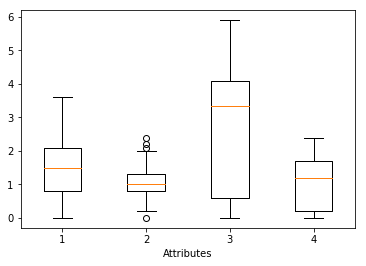

In [30]:
plt.boxplot(iris_np_zero_min)
plt.xlabel("Attributes")
plt.show() # Note the absolute minimum value of each attribute.

__EXERCISE__

Normalise the iris data so that each attribute is between $[0, 1]$.

HINT: the range is `max - min`.

# Real-world Data Wrangling Example 1: Sea Surface Temperature Records

In [0]:
try:
    import netCDF4
except:
    !pip install netcdf4
    
try:
    import plotly
    major_plotly_version = int(plotly.__version__.split('.')[0])
    assert major_plotly_version >= 4
except:
    !pip install plotly==4.1.0
    
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import xarray as xr  
COLAB = True

In this example, we practice our skills to manipulate large complex array data. We consider the global sea surface temperature (SST) records over the past 100 years. The data consists of measurements conducted by various devices including commercial/military vehicles, satellites, etc. See [Wikipedia][sst] document for further information. The data we will use is from [NOAA/ERSL/PSD][esrl] (The US National Oceanic and Atmospheric Administration Earth System Research Laboratory's Physical Sciences Division). Data source: [link](https://www.esrl.noaa.gov/psd/data/gridded/).

The data is in NetCDF format. They are essentially high-dimensional arrays. However, the dimensions are of physical significance (e.g. longitudes/longitudes/years). We will use the `xarray` library to process the arrays. At the backend, `xarray` uses `netcdf` library to access the data.

[esrl]:https://www.esrl.noaa.gov/psd/ 
[sst]:https://en.wikipedia.org/wiki/Sea_surface_temperature

In [0]:
# Duplicate for convenient reference not need to execute
try:
    import netCDF4
except:
    !pip install netcdf4
import xarray as xr    

## Prepare Data

It is a good habit to maintain the data and the code in an ordered away in the file system.  It allows you to use cloud computing facilities (where you may not be able to store data for long) and make it easier to back up all your work.

In the following code cell, we try to open the dataset file at a designated location.  If the file does not exist, we will download the raw data.  If the location does not exist, we will create the folders accordingly.

In [0]:
from pathlib import Path
DATA_URL = 'ftp://ftp.cdc.noaa.gov/Datasets/COBE2/sst.mon.mean.nc'
DATA_FILENAME = "sst.mon.mean.nc"

data_dir = Path("./data/global-sst")
# Create dir structure if not existing
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

Check if the dataset file exists, if not, download the file.

HINT: If used often, you can also maintain a file in your own google drive (the file-id I provided in class won't persist). To access your GoogleDrive files, you can checkout a code-snippet provided by colab that "mounts" the drive (then you can view it as a local folder). 

In [5]:
#@title Data Manage
#@markdown Check the data file and download or access from Google Drive. Choose the data source
#@markdown You need to authorise colab to activate the Google Drive function
#@markdown using your Google Account
data_source = "Google Drive"  #@param ['Existing', 'Google Drive', 'NOAA/ERSL']
#@markdown --- 

if not filepath.exists():
    if data_source == 'Existing':
        raise ValueError("File doesn't exist, plese choose a source to get the file")
    elif data_source == "Google Drive":
        # Install the PyDrive wrapper & import libraries.
        # This only needs to be done once per notebook.
        !pip install -U -q PyDrive
        from pydrive.auth import GoogleAuth
        from pydrive.drive import GoogleDrive
        from google.colab import auth
        from oauth2client.client import GoogleCredentials

        # Authenticate and create the PyDrive client.
        # This only needs to be done once per notebook.
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)

        # Download a file based on its file ID.
        #
        # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
        file_id = '1WNKcsEz2c69RsFuHLGUDYmydq5wukmiY'
        downloaded = drive.CreateFile({'id': file_id})
        downloaded.GetContentFile(str(filepath))
    elif data_source == "NOAA/ERSL":
        import urllib.request
        urllib.request.urlretrieve(DATA_URL, str(filepath))
        
        
        

     |████████████████████████████████| 993kB 2.8MB/s 


Now we are ready to load the multi-dimensional array of SST data.

In [0]:
data = xr.open_dataset(str(filepath.absolute()))

Now we have `data` -- the object returned by opening the dataset. So we can simply let the Notebook to “print out” the object to get some basic information about it. 

## Initial Exam

In [7]:
data

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 2028)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:            created 12/2013 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    References:       http://www.esrl.noaa.gov/psd/data/gridded/cobe2.html
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/

From the brief description we can figure out that the essential information of this data set is stored in: 
```
Data variables:
    sst      (time, lat, lon) float32 ...
```
So let us further examine this sub-field of the `data` object.

In [8]:
data.sst

<xarray.DataArray 'sst' (time: 2028, lat: 180, lon: 360)>
[131414400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2018-12-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-2.043 34.392]

We can consider `data.sst` as a normal three dimensional array (similar to `numpy.ndarray`), check its shape and take one slice to visualise.

SST data shape (2028, 180, 360)
The slice of SST data of time-dimension[0] shape: (180, 360)
Visualise the slice as an image


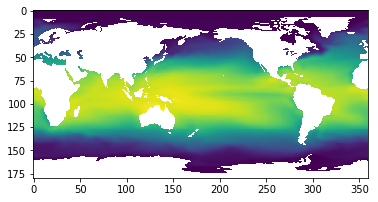

In [9]:
print("SST data shape", data.sst.shape)
print("The slice of SST data of time-dimension[0] shape:", data.sst[0].shape)
print("Visualise the slice as an image")
plt.imshow(data.sst[0])
plt.show()

Well, the figure looks ... oceanic. But the dataset provides more information about the axes. Let us investigate.

The `xarray` library wraps the data in an object `xarray.DataArray`, which provides us with a more meaningful way of accessing the data by referring to the axes concerning their semantics.

Let us check the dimension of `time`:

In [10]:
data.sst.time

<xarray.DataArray 'time' (time: 2028)>
array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', ..., '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2018-12-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [-14975.  46720.]

Interestingly, this dimension itself is represented using another `DataArray` object.  We notice its data type (`dtype`) is `datetime64[ns]`, which is a numpy class representing a precise moment.  So let us try to use a time object to index the array (The object was new to me as well,  I just googled using the keywords "numpy datetime64"). 

Note the `squeeze` removes singular dimensions from the result slice. Check `numpy.squeeze` for more details.

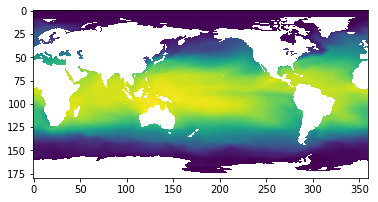

In [11]:
day = np.datetime64('1980-12-01')
sst_day = data.sst[data.sst.time == day].squeeze()
plt.imshow(sst_day.values)
plt.show()

Since the sea surface temperature data are measurements on a grid, sometimes it is useful to create coordinate grids for the individual measurements. E.g. the DataArray contains

| .       |    Logitudes| 0| 1| 2| 3| 4| 
|-|-|-|-|-|-|-|
|Latitudes|            .| .| .| .| .| .|
|0|.|$v_{0,0}$|v|v|v|v|
|1|.|v|v|v|v|$v_{1,4}$|

For some convenience, we want to represent the data in one long table

|Latitudes|Logitudes|Value|
|-|-|-|
|0|0|$v_{0, 0}$|
|0|1|$v_{0, 1}$|
...


The table has the same number of rows as the number of total elements in the original 2D array.

In `numpy`, the coordinates can be constructed using `meshgrid`, please google and try.
```python
xx, yy = np.meshgrid(np.array([0, 1, 2]), np.array([99, 100]))
print("x-grid")
print(xx)
print("y-grid")
print(yy)
print("coordinate-grid")
print(np.stack((xx.flatten(), yy.flatten())))
```

As to `xarray.DataArray`, the object provides a direct method to generate a table with coordinate grids via its `to_dataframe()` function. Note the generated frame will have "multiple index" (working similary as the latitudes and logitudes as in the original data), we need to `reset_index()` to have the `lat` and `lon` as independent columns.

In [0]:
sst_day_df = sst_day[::3, ::3].to_dataframe() #::3, take measure 
# sample every 3 locations, to reduce computational demand for visualisation
sst_day_df.reset_index(inplace=True)

In [13]:
sst_day_df.head()

,lat,lon,time,sst
0,89.5,0.5,1980-12-01,-1.683
1,89.5,3.5,1980-12-01,-1.683
2,89.5,6.5,1980-12-01,-1.685
3,89.5,9.5,1980-12-01,-1.685
4,89.5,12.5,1980-12-01,-1.685


We can use plotly to show interactive plot of the SST data.

In [14]:
DRAW_EXPRESS = True
if DRAW_EXPRESS:
    # px.set_mapbox_access_token("pk.eyJ1IjoianVuankwMDciLCJhIjoiY2p6aWs5bDZxMDA1ZDNjczM1cmFiMjc5MCJ9.ixcf00oF_QL5eg44OP9fuQ")
    fig = px.scatter_geo(sst_day_df, lat="lat", lon="lon", color="sst", 
                         color_continuous_scale=px.colors.sequential.Viridis)
    fig.show()
else:
    # More control. But verbose coding.
    fig_geo_data = go.Scattergeo(
        lat=sst_day_df.lat, 
        lon=sst_day_df.lon, 
        text=["sst={:.2f}".format(s_) for s_ in sst_day_df.sst],
        marker=dict(color=sst_day_df.sst, colorscale="Viridis"),
        name="Global Sea Surface Temperature in Dec 1980")
    fig = go.Figure(data=fig_geo_data)
    fig.show()



## Investigate an Area of Interest

Partially to practice array operation skills and partially to investigate an idea, let us extract the SST from a tropical sea area. We construct boolean indexes to take SST values from east tropical pacific ocean (you can try your own idea, e.g. check the "Nino 3.4 Region" related to [El Nino][elnino]).

[elnino]:https://en.wikipedia.org/wiki/El_Ni%C3%B1o

In [0]:
# Specify the boundaries of the area
lat_north = 10.5
lat_south = -10.5
lon_west = 230.5
lon_east = 260.5

Indexing by boolean tests works similarily in mainstream array tools. See this [document][adv-arr-index] of numpy.

[adv-arr-index]:https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html

In [16]:
lat_index = (lat_south <= data.sst.lat) * (data.sst.lat <= lat_north)
lon_index = (lon_west <= data.sst.lon) * (data.sst.lon <= lon_east)
interested_sea_area = data.sst[:, lat_index, lon_index]
print(interested_sea_area)

<xarray.DataArray 'sst' (time: 2028, lat: 22, lon: 31)>
[1383096 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 10.5 9.5 8.5 7.5 6.5 ... -6.5 -7.5 -8.5 -9.5 -10.5
  * lon      (lon) float32 230.5 231.5 232.5 233.5 ... 257.5 258.5 259.5 260.5
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2018-12-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-2.043 34.392]


The brief information shows the area is a cut-off block from the global SST data of 22 latitudes and 31 longitudes.

In [17]:
# Heatmap is another intuitive visualisation for array data.
fig = go.Figure(data=[go.Heatmap(x=interested_sea_area.lon,
                                 y=interested_sea_area.lat,
                                 z=interested_sea_area[0,:,:])])
fig.show()

## Examine Trend in Time

Let us examine if there is any time-related trend in the average temperature of the sea area. We need to compute the average SST value for the entire range of longitudes and latitudes. The computation needs to be done for every time spot. This corresponds to the "reduce" operation introduced above. The "reducing" applies to two dimensions: "lon" for longitudes and "lat" for latitudes. After the operation, we will arrive at a series (1-D) of average SST values, each corresponding to one time of record.

In [18]:
interested_sea_area_sst_mean = interested_sea_area.mean(dim=["lon", "lat"])
print(interested_sea_area_sst_mean)

<xarray.DataArray 'sst' (time: 2028)>
array([24.65991 , 25.297405, 25.86431 , ..., 25.959814, 26.012383, 26.184372],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2018-12-01


In [19]:
scatter_data = go.Scatter(
    x=interested_sea_area_sst_mean.time.to_series(), # so the time is human readable
    y=interested_sea_area_sst_mean,
    mode="markers+lines")
fig = go.Figure(data=[scatter_data])
fig.show()

The data is obviously periodic -- the temperature rises and falls through a year. Let's take a look at a particular month, say December.

Also for practice, lets work with `pandas.DataFrame`. Following an [example][pandas-datetime], we can add auxillary-columns to the dataframe to facilitate selection. Note the `apply` operation represents an important design pattern "mapping/transforming", where we give a list of object and a processing function. The data manager (here is the `DataFrame`) is responsible to pass each object in the list sequentially to the function to process.

[pandas-datetime]:https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d

In [20]:
sst_area_mean_df = interested_sea_area_sst_mean.to_dataframe()
sst_area_mean_df.reset_index(inplace=True)

sst_area_mean_df["month"] = sst_area_mean_df["time"].apply(lambda x:x.month) #
sst_area_mean_df["year"] = sst_area_mean_df["time"].apply(lambda x:x.year) #
sst_area_mean_df.head() # Now we have access to year and month

,time,sst,month,year
0,1850-01-01,24.659910,1,1850
1,1850-02-01,25.297405,2,1850
2,1850-03-01,25.864309,3,1850
3,1850-04-01,26.543064,4,1850
4,1850-05-01,26.945398,5,1850


For exploratory purposes, I would adopt a quick dirty trick. We just take one particular month from each year and examine the trend of the average SST in the area of this month.

In [0]:
sst_area_mean12_df = sst_area_mean_df.loc[sst_area_mean_df["month"]==12]

Now let's visualise the data.

In [22]:
DRAW_EXPRESS = True
if DRAW_EXPRESS:
    fig = px.scatter(sst_area_mean12_df, x="year", y="sst", trendline="ols", range_x=[1849, 2020])
    
else:
    fig = go.Figure(data=[go.Scatter(
        x=sst_area_mean12_df["year"], 
        y=sst_area_mean12_df["sst"],
        mode="markers+lines")]
    )
fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Any trend? How does the ocean affect us?

# Real-world Data Wrangling Example 2: World Food Production Data

The [data][unfao-crop-product-data] is from the United Nations Food and Agriculture Organisation ([UN FAO][unfao]). In this example, we will look at the [crop production][unfao-qc]. UNFAO publishes a wide range of data related to food, agriculture, as well as social development and human wellbeing. See their [document][unfao-crop-product-spec] for more information.

[unfao-crop-product-data]:http://fenixservices.fao.org/faostat/static/bulkdownloads/Production_Crops_E_All_Data.zip
[unfao]:http://www.fao.org/faostat/en/#home
[unfao-qc]:http://www.fao.org/faostat/en/#data/QC
[unfao-crop-product-spec]:http://fenixservices.fao.org/faostat/static/documents/QC/QC_methodology_e.pdf

## Prepare Data

At above, we fetch the data from the Internet if not existing.

In [0]:
# ** Food Data File **
FAOSTAT_DATA_URL = "http://fenixservices.fao.org/faostat/static/bulkdownloads/" +\
    "Production_Crops_E_All_Data_(Normalized).zip"
DATA_FILENAME = "Production_Crops_E_All_Data_(Normalized).zip"
data_dir = Path("./data/food-supply")
# Create dir structure if not existing
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

if not filepath.exists():
    import urllib.request
    urllib.request.urlretrieve(FAOSTAT_DATA_URL, str(filepath))    
filepath = str(filepath.absolute()) 

# ** Country Code File ** (for visualisation)
# Note the github raw file link is DIFFerent from the file-view link, see 
# the link below for more information:
# https://stackoverflow.com/questions/4604663/download-single-files-from-github
ISO_COUNTRY_CODE_CSV_URL = \
    "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
ISO_COUNTRY_CODE_CSV_FILENAME = "ISO-3166.csv"

iso_country_code_csv_filename = data_dir / ISO_COUNTRY_CODE_CSV_FILENAME
if not iso_country_code_csv_filename.exists():
    import urllib.request
    urllib.request.urlretrieve(ISO_COUNTRY_CODE_CSV_URL, str(iso_country_code_csv_filename))
iso_country_code_csv_filename = str(iso_country_code_csv_filename.absolute())
iso_country_df = pd.read_csv(iso_country_code_csv_filename)

## Initial Explore

The FAO data is a table. We read it using `pandas.DataFrame`. `pandas` can handle compressed CSV file. However, the table contains characters not encoded in 'utf-8', we need to specify the encoding. 

Note for exploratory manipulation, I found it is handy to keep a cheatsheet of the data toolbox in reach. In this example, consider [this cheatsheet][pandas-cheatsheet].

[pandas-cheatsheet]:https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [0]:
df = pd.read_csv(filepath,
    compression='zip', encoding = "ISO-8859-1")

First glance:

In [25]:
df.head() # What columns does it have? How the data samples look like?

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


There are about 10 informative columns. What is the size of the data?

In [26]:
len(df)

2425275

That is a lot.  Let's narrow our focus for now. E.g. consider some `Item` in particular. However, even if we only look at the `Item` column, there still be 2M+ elements:

In [27]:
df['Item']

0          Almonds, with shell
1          Almonds, with shell
2          Almonds, with shell
3          Almonds, with shell
4          Almonds, with shell
5          Almonds, with shell
6          Almonds, with shell
7          Almonds, with shell
8          Almonds, with shell
9          Almonds, with shell
10         Almonds, with shell
11         Almonds, with shell
12         Almonds, with shell
13         Almonds, with shell
14         Almonds, with shell
15         Almonds, with shell
16         Almonds, with shell
17         Almonds, with shell
18         Almonds, with shell
19         Almonds, with shell
20         Almonds, with shell
21         Almonds, with shell
22         Almonds, with shell
23         Almonds, with shell
24         Almonds, with shell
25         Almonds, with shell
26         Almonds, with shell
27         Almonds, with shell
28         Almonds, with shell
29         Almonds, with shell
                  ...         
2425245     Vegetables Primary
2425246 

But it seems there are a lot of repetitions. So the natural idea is to check what are the unique values in this list.

In [28]:
df['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Cotton lint',
       'Cottonseed', 'Figs', 'Fruit, citrus nes', 'Fruit, fresh nes',
       'Fruit, stone nes', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Nuts, nes', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Pulses, nes',
       'Rice, paddy', 'Seed cotton', 'Sesame seed', 'Spices, nes',
       'Sugar beet', 'Sugar cane', 'Sunflower seed',
       'Vegetables, fresh nes', 'Walnuts, with shell', 'Watermelons',
       'Wheat', 'Cereals (Rice Milled Eqv)', 'Cereals,Total',
       'Citrus Fruit,Total', 'Coarse Grain, Total', 'Fibre Crops Primary',
       'Fruit Primary', 'Oilcrops, Cake Equivalent',
       'Oilcrops, Oil Equivalent', 'Pulses,Total',
       'Roots and Tubers,Total', 'Treenuts,Total', 'Vegetables Primary',
       'Beans, dry', 'Be

This looks much more manageable.

Note the `unique` keyword is universal in many toolboxes. Usually, a library also provides a more convenient function that checks both the unique values and how many data samples having each value.

In [29]:
df['Item'].value_counts()

Fruit Primary                   38636
Vegetables Primary              38598
Roots and Tubers,Total          38424
Vegetables, fresh nes           37972
Cereals,Total                   35110
Cereals (Rice Milled Eqv)       35110
Oilcrops, Oil Equivalent        34801
Oilcrops, Cake Equivalent       34492
Coarse Grain, Total             34391
Pulses,Total                    32767
Tomatoes                        32687
Maize                           32168
Fruit, fresh nes                30529
Potatoes                        30235
Cabbages and other brassicas    27994
Citrus Fruit,Total              27886
Onions, dry                     27334
Bananas                         27154
Tobacco, unmanufactured         26952
Rice, paddy                     25426
Cucumbers and gherkins          25423
Sweet potatoes                  25280
Beans, dry                      24644
Fibre Crops Primary             24544
Oranges                         24521
Carrots and turnips             24436
Groundnuts, 

To begin with, let us consider one item, "Wheat" ("Bananas" and "Vegetables Primary" may also be good choices for experiments).

In [0]:
wheat_data = df.loc[df['Item'] == "Wheat"]

In [31]:
wheat_data.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
5757,2,Afghanistan,15,Wheat,5312,Area harvested,1961,1961,ha,2230000.0,NaN
5758,2,Afghanistan,15,Wheat,5312,Area harvested,1962,1962,ha,2341000.0,NaN
5759,2,Afghanistan,15,Wheat,5312,Area harvested,1963,1963,ha,2341000.0,NaN
5760,2,Afghanistan,15,Wheat,5312,Area harvested,1964,1964,ha,2345000.0,NaN
5761,2,Afghanistan,15,Wheat,5312,Area harvested,1965,1965,ha,2347000.0,NaN


It looks the table also contains different aspects relating to the production of wheat. As above, we consider the unique values of the column “Element”.

In [32]:
wheat_data['Element'].value_counts()

Area harvested    8084
Production        8069
Yield             8013
Name: Element, dtype: int64

As above, we consider the unique values of the column “Element”. Now we can form clearer ideas about the table. In the next, we consider the “Yield” (it seems to be the yield of unit land area).

In [0]:
wheat_yield = wheat_data.loc[wheat_data["Element"] == "Yield"]

In [34]:
wheat_yield.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
5814,2,Afghanistan,15,Wheat,5419,Yield,1961,1961,hg/ha,10220.0,Fc
5815,2,Afghanistan,15,Wheat,5419,Yield,1962,1962,hg/ha,9735.0,Fc
5816,2,Afghanistan,15,Wheat,5419,Yield,1963,1963,hg/ha,8317.0,Fc
5817,2,Afghanistan,15,Wheat,5419,Yield,1964,1964,hg/ha,9510.0,Fc
5818,2,Afghanistan,15,Wheat,5419,Yield,1965,1965,hg/ha,9723.0,Fc


Let us check the yield of a few areas in the world. Note the query to the `DataFrame` below. You can use `wheat_yield["Area"].unique()` to find the area names to form your queries. Please refer to [pandas document][qry-doc] for more information about queries in `pandas`.

[qry-doc]:https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-query

In [35]:
px.scatter(wheat_yield.query('Area == ["Australia", "India", "China", "United States of America"]'), 
           x="Year", y="Value", color="Area", trendline="ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Well the trend looks encouraging enough to deserve a movie! :P 

In [36]:
px.scatter(wheat_yield.query('Area == ["Australia", "India", "China", "United States of America"]'), 
           x="Year", y="Value", size="Value", color="Area",
           animation_frame="Year", animation_group="Area", range_x=[1950, 2020], range_y=[0, 60000])

But there seems to be oscillations in the growth, which may deserve further investigation.

## Visualise and Examine the Aspect of Interest

Let us picture the yield of wheat globally,  which both gives us first impression about the trend and looks nice for report.

To generate the global picture with geographical information, we would need a list of the country code.   We have downloaded the code list with country names from the Internet. Now we want to merge this table to the food production table.

In [37]:
# We care only about name-code correspondence in the area-code table.
# And we want the country-name-column are referred to consistently as "Area" 
# in both tables.
iso_info_df = iso_country_df[["name", "alpha-3"]]\
    .rename(columns={"name": "Area", "alpha-3": "AreaAlphaCode"})
iso_info_df.head()

,Area,AreaAlphaCode
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


Now we merge the two tables with respect to the column of country names.

In [38]:
wheat_yield_cc = pd.merge(wheat_yield, iso_info_df, on="Area") # Get Area Code for Visualisation
wheat_yield_cc.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,AreaAlphaCode
0,2,Afghanistan,15,Wheat,5419,Yield,1961,1961,hg/ha,10220.0,Fc,AFG
1,2,Afghanistan,15,Wheat,5419,Yield,1962,1962,hg/ha,9735.0,Fc,AFG
2,2,Afghanistan,15,Wheat,5419,Yield,1963,1963,hg/ha,8317.0,Fc,AFG
3,2,Afghanistan,15,Wheat,5419,Yield,1964,1964,hg/ha,9510.0,Fc,AFG
4,2,Afghanistan,15,Wheat,5419,Yield,1965,1965,hg/ha,9723.0,Fc,AFG


In [39]:
px.scatter_geo(wheat_yield_cc, locations="AreaAlphaCode", size="Value", animation_frame="Year")

The bubbles seem to be breathing. Let's try to find out if the physical process on the earth has something to do we our food.

## Explore Links between two Processes

Let us combine the food data with the SST data. Note we need to rename the column of "year" in SST data to "Year". The match must be exact.

In [40]:
food_ocean = pd.merge(wheat_yield_cc, sst_area_mean12_df.rename(columns={"year": "Year"}), on="Year")
food_ocean.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,AreaAlphaCode,time,sst,month
0,2,Afghanistan,15,Wheat,5419,Yield,1961,1961,hg/ha,10220.0,Fc,AFG,1961-12-01,24.61063,12
1,3,Albania,15,Wheat,5419,Yield,1961,1961,hg/ha,7731.0,Fc,ALB,1961-12-01,24.61063,12
2,4,Algeria,15,Wheat,5419,Yield,1961,1961,hg/ha,4060.0,Fc,DZA,1961-12-01,24.61063,12
3,7,Angola,15,Wheat,5419,Yield,1961,1961,hg/ha,11111.0,Fc,AGO,1961-12-01,24.61063,12
4,9,Argentina,15,Wheat,5419,Yield,1961,1961,hg/ha,12950.0,Fc,ARG,1961-12-01,24.61063,12


The first step is to compute the increase of the production from one year to the next.

In [41]:
dfs = []
for cc in ["AUS", "CHN", "IND", "USA"]:
    df = food_ocean.loc[food_ocean.AreaAlphaCode == cc]
    df["Growth"] = df.Value.shift(-1) - df.Value # check how shift does to data frames
    dfs.append(df)
    
g_df = pd.concat(dfs)
g_df['SSTDevi'] = g_df.sst - g_df.sst.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [42]:
px.scatter(g_df, x="Growth", y="SSTDevi", size="Value", color="Area", animation_frame="Year",
          range_y=[-3, +3], range_x=[-10000, 10000])

More investigation is needed.

Check the following reference for more information

http://www.fao.org/3/y4011e/y4011e04.htm